In [121]:
import math
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import num_methods as nm
from drawing import *

In [122]:
# TODO: remove list, можно использовать предыдущее значение
def newtonsMethod(a, c, T, y, b, x):
    l = [x]  # list of x(y) values
    for _ in range(100):
        xn = l[-1]  # previous value of x
        y_x = ((-xn+c)*T+y)/(1+b*T)  # y выраженный через х

        f = -xn+(-a*(xn**3/3-xn) + a*y_x)*T+x  # вот это есть в классе
        g = -1+a*T*(-T/(b*T+1)-xn**2+1)

        l.append(l[-1] - f/g)
    return l[-1]

In [123]:
"""Неявный метод Эйлера 1-го порядка"""
def implicit_method(T, xvn, yvn, a, c, b):
    xn2 = newtonsMethod(a, c, T, yvn, b, xvn)
    yn2 = (T*(-xn2+c) + yvn)/(1+b*T)
    return (xn2, yn2)

[scipy root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html),
[Jacobian](<https://math.libretexts.org/Bookshelves/Calculus/Supplemental_Modules_(Calculus)/Vector_Calculus/3%3A_Multiple_Integrals/3.8%3A_Jacobians>)


In [124]:
# """Неявный метод Хаммера-Холлингсворта 4-го порядка"""
# def implicit2_method(T, xvn, yvn, ak, ck, bk):
#      # Таблица Бутчера
#      a = [[1/4, 1/4 - math.sqrt(3)/6],
#           [1/4 + math.sqrt(3)/6, 1/4]]
#      c = [(1/2 - math.sqrt(3)/6), 1/2 + math.sqrt(3)/6]
#      b = [1/2, 1/2]

#      # x[0] = kx1, x[1] = kx2
#      def fkx(x):
#           xvn1 = xvn + T * (a[0][0] * x[0] + a[0][1] * x[1])
#           xvn2 = xvn + T * (a[1][0] * x[0] + a[1][1] * x[1])
#           # т.к. уравнения равны нулю, вычитаем kx1 и kx2
#           return [-ak * ((xvn1) ** 3 / 3 - xvn1 - (yvn + c[0] * T)) - x[0],
#                   -ak * ((xvn2) ** 3 / 3 - xvn2 - (yvn + c[1] * T))- x[1]]
     
#      def jac_fkx(x):
#           xvn1 = xvn + T * (a[0][0] * x[0] + a[0][1] * x[1])
#           xvn2 = xvn + T * (a[1][0] * x[0] + a[1][1] * x[1])
#           # Якобиан системы, частные производные от каждого
#           # уравнения по каждой переменной
#           return np.array([[-ak * ((xvn1) ** 2 * T * a[0][0] - T * a[0][0]) - 1,
#                           -ak * ((xvn1) ** 2 * T * a[0][1] - T * a[0][1])],
#                           [-ak * ((xvn2) ** 2 * T * a[1][0] - T * a[1][0]),
#                           -ak * ((xvn2) ** 2 * T * a[1][1] - T * a[1][1]) - 1]])


#      sol = optimize.root(fun=fkx, x0=[0, 0],
#                          jac=jac_fkx, method='hybr')
#      xn = xvn + T * (b[0] * sol.x[0] + b[1] * sol.x[1])

#      # y[0] = ky1, y[1] = ky2
#      def fky(y):
#           yvn1 = yvn + T * (a[0][0] * y[0] + a[0][1] * y[1])
#           yvn2 = yvn + T * (a[1][0] * y[0] + a[1][1] * y[1])
#           return [-(xvn + c[0] * T) - bk * yvn1 + ck - y[0],
#                   -(xvn + c[1] * T) - bk * yvn2 + ck - y[1]]
     
#      def jac_fky(y):
#           return np.array([[-bk * T * a[0][0] - 1, -bk * T * a[0][1]],
#                            [-bk * T * a[1][0], -bk * T * a[1][1] - 1]])

#      sol = optimize.root(fun=fky, x0=[0, 0],
#                          jac=jac_fky, method='hybr')
#      yn = yvn + T * (b[0] * sol.x[0] + b[1] * sol.x[1])

#      return (xn, yn)

In [125]:

def fx(t, xvn, yvn, a, b, c):
    return -a*((xvn**3)/3-xvn) + a*yvn

def fy(t, xvn, yvn, a, b, c):
    return -xvn + c - b*yvn

In [126]:
# from scipy import optimize
# """Неявный метод Эйлера 1-го порядка"""
# def implicit2_method(T, xvn, yvn, a, b, c):
#         def fk(x):
#                 return [T * fx(t, x[0], x[1], a) - x[0] + xvn,
#                         T * fy(t, x[0], x[1], a) - x[1] + yvn]

# # return 10(cos(t) ** 2 sin(t) + 2cos(t) - (2 + xvn yvn)*xvn) - yvn
#         def jac_fk(x):
#                 return [[-a * (x[0] * x[1] + 2) * T - 1, (-a * x[0] * x[0] - 1) * T],
#                                 [-T * 1, T * 1 - 1]]

#         sol = optimize.root(fun=fk, x0=[0, 0],
#                         jac=jac_fk, method='hybr')
#         return (sol.x[0], sol.x[1])

In [127]:
# """Неявный метод Хаммера-Холлингсворта 4-го порядка"""
# def ch_implicit2_method(T, xvn, yvn, ak, bk, ck):
#      # Таблица Бутчера
#      a = [[1/4, 1/4 - math.sqrt(3)/6],
#           [1/4 + math.sqrt(3)/6, 1/4]]
#      # c = [(1/2 - math.sqrt(3)/6), 1/2 + math.sqrt(3)/6]
#      b = [1/2, 1/2]

#      # x[0] = kx1, x[1] = kx2
#      def fk(vec):
#           # kx1 = T * fx(t, xvn + a[0][0] * kx1 + a[0][1] * kx2, yvn + a[0][0] * ky1 + a[0][1] * ky2)
#           # ky1 = T * fy(t, xvn + a[0][0] * kx1 + a[0][1] * kx2, yvn + a[0][0] * ky1 + a[0][1] * ky2)
#           # kx2 = T * fx(t, xvn + a[1][0] * kx1 + a[1][1] * kx2, yvn + a[1][0] * ky1 + a[1][1] * ky2)
#           # ky2 = T * fx(t, xvn + a[1][0] * kx1 + a[1][1] * kx2, yvn + a[1][0] * ky1 + a[1][1] * ky2)

#           # vec = [kx1, kx2, ky1, ky2]
#           xn = [xvn + T * (a[0][0] * vec[0] + a[0][1] * vec[1]), xvn + T * (a[1][0] * vec[0] + a[1][1] * vec[1])]
#           yn = [yvn + T * (a[0][0] * vec[2] + a[0][1] * vec[3]), yvn + T * (a[1][0] * vec[2] + a[1][1] * vec[3])]
          
#           # т.к. уравнения равны нулю, вычитаем k
#           return [fx(xn[0], yn[0], ak, bk, ck) - vec[0],  # kx
#                   fx(xn[1], yn[1], ak, bk, ck) - vec[1],
#                   fy(xn[0], yn[0], ak, bk, ck) - vec[2],  # ky
#                   fy(xn[1], yn[1], ak, bk, ck) - vec[3]]
     
#      def jac_fk(vec):
#           # Якобиан системы, частные производные от каждого
#           # уравнения по каждой переменной

#           # fx dx = -a(xvn ** 2 - 1)
#           # fx dy = a
#           # fy dx = -1
#           # fy dy = -b
#           # умножить на производные от xn, yn по vec[i]
#           # vec = [kx1, kx2, ky1, ky2] в таком же порядке берем частные производные
#           # в таком же порядке матрица вертикально

#           return np.array([[-ak * (xn[0] ** 2 - 1) * T * a[0][0] - 1, -ak * (xn[0] ** 2 - 1) * T * a[0][1], ak * T * a[0][0], ak * T * a[0][1]],
#                            [-ak * (xn[0] ** 2 - 1) * T *  a[1][0], -ak * (xn[0] ** 2 - 1) * T * a[1][1] - 1, ak * T * a[1][0], ak * T * a[1][1]],
#                            [-T * a[0][0], -T * a[0][1], -bk * T * a[0][0] - 1, -bk * T * a[0][1]],
#                            [-T * a[1][0], -T * a[1][1], -bk * T * a[1][0], -bk * T * a[1][1] - 1]])


#      sol = optimize.root(fun=fk, x0=[0, 0, 0, 0],
#                          jac=jac_fk, method='hybr')
#      xn = xvn + T * (b[0] * sol.x[0] + b[1] * sol.x[1])
#      yn = yvn + T * (b[0] * sol.x[2] + b[1] * sol.x[3])

#      return (xn, yn)

In [128]:
# новый шаг
def get_p(array):
    s = sum([i ** 2 for i in array])
    return math.sqrt(s)

# T0 - максимальный возможный шаг
def new_T(last_T, T0, array, array_prev, L):
    p = get_p(array)
    F = [i / p for i in array]
    p_prev = get_p(array_prev)
    F_prev = [i / p_prev for i in array_prev]
    X = [(F[i] - F_prev[i]) / last_T for i in range(len(F))]
    XX = sum([i ** 2 for i in X])
    new_T = T0 / (1 + math.sqrt(L) * XX ** (1/4))
    return new_T

def do_method(method, t_start, t_finish, tl, array, variables, dynamic_step: bool=True):
    T, a, b, c = [i for i in variables]
    max_step = T

    array_T = [T]
    array_dif = [(fx(1, array[-1][0], array[-1][1], a, b, c),
                    fy(1, array[-1][0], array[-1][1], a, b, c))]
    while tl[-1] <= t_finish:
        array.append(method(T, array[-1][0], array[-1][1], a, c, b))
        array_dif.append((fx(1, array[-1][0], array[-1][1], a, b, c),
                fy(1, array[-1][0], array[-1][1], a, b, c)))
        if dynamic_step:
            T = new_T(array_T[-1], max_step, array[-1], array[-2], t_finish - t_start)
        array_T.append(T)
        tl.append(tl[-1] + T)
    return (tl, array, array_dif)

$x' = -a(\frac{x^3}{3} - x) - ay$\
$y' = -x - by + c$\
$x(0) = 2,\quad y(0) = 0$\
Здесь 1 $\leq$ _a_ $\leq$ 10^3, 0 < _c_ < 1.
Провести исследование поведения решений в зависимости от значений «большого» параметра _a_.


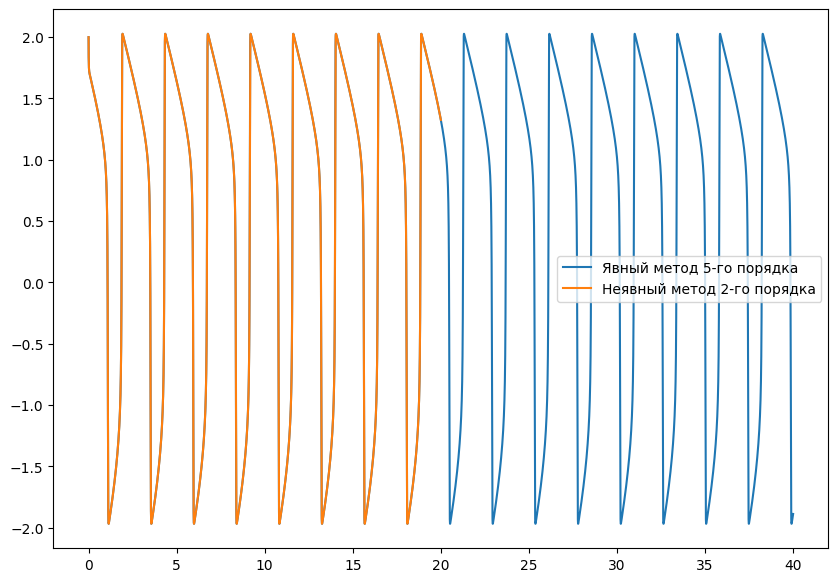

In [129]:
from num_methods import Solver2
from drawing import draw


T = 0.001
t_start = 0
t_finish = 20
a = 50
c = 0.5
b = 0.4
# Первый элемент это x, второй y
variables = (T, a, b, c)

sol = Solver2((fx, fy), [a, b, c], (2, 0), (0, 40))

array1 = sol.do_method(sol.explicit5_method, T)
array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(2, 0)], variables)

arrayx1 = [i[0] for i in array1[1]]
arrayx2 = [i[0] for i in array2[1]]

# main_array.append(arrayx3)
# print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
# array_dif_x3 = [[i[0] for i in array3_dif]]
draw([array1[0], array2[0]],
     [arrayx1, arrayx2],
     ["Явный метод 5-го порядка", "Неявный метод 2-го порядка"])
# draw([[i[0] for i in array2[2]]], [arrayx2], ["x' from x"])

### Сравнение с решением с помощью SciPy


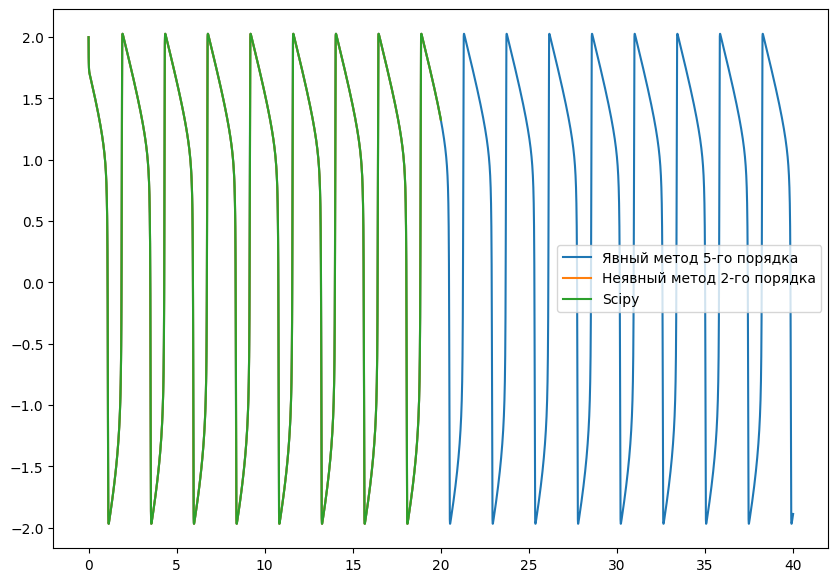

In [130]:
from scipy.integrate import ode

def f(t, y, a, b, c):
  return [a*(y[0] + y[1] - y[0]**3/3),
          c - y[0] - b*y[1]]

def jac(t, y, a, b, c):
  return [[a*(1 - y[0]**2),  a],
          [             -1, -b]]

y01, y02 = 2., 0.
r = ode(f, jac).set_integrator('vode', method='adams', with_jacobian=True)
r.set_initial_value((y01, y02)).set_f_params(a, b, c).set_jac_params(a, b, c)

t1, dt, t, y1, y2 = t_finish, T, [0.], [y01], [y02]
while r.successful() and r.t < t1:
  r.integrate(r.t + dt)
  t.append(r.t)
  y1.append(r.y[0])
  y2.append(r.y[1])

draw([array1[0], array2[0], t],
     [arrayx1, arrayx2, y1],
      [f"Явный метод 5-го порядка", "Неявный метод 2-го порядка", f"Scipy"])

Веселые рисунки


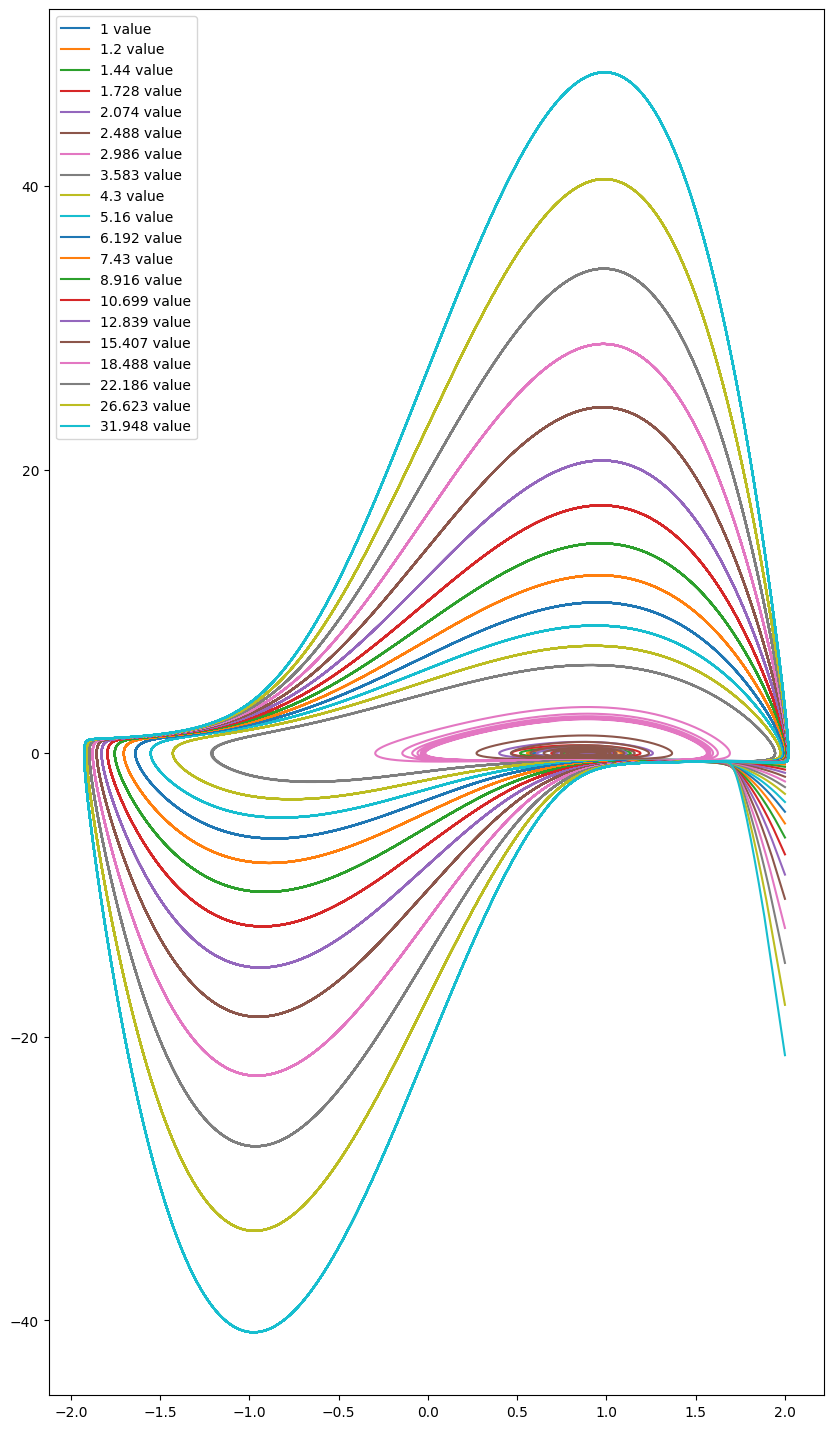

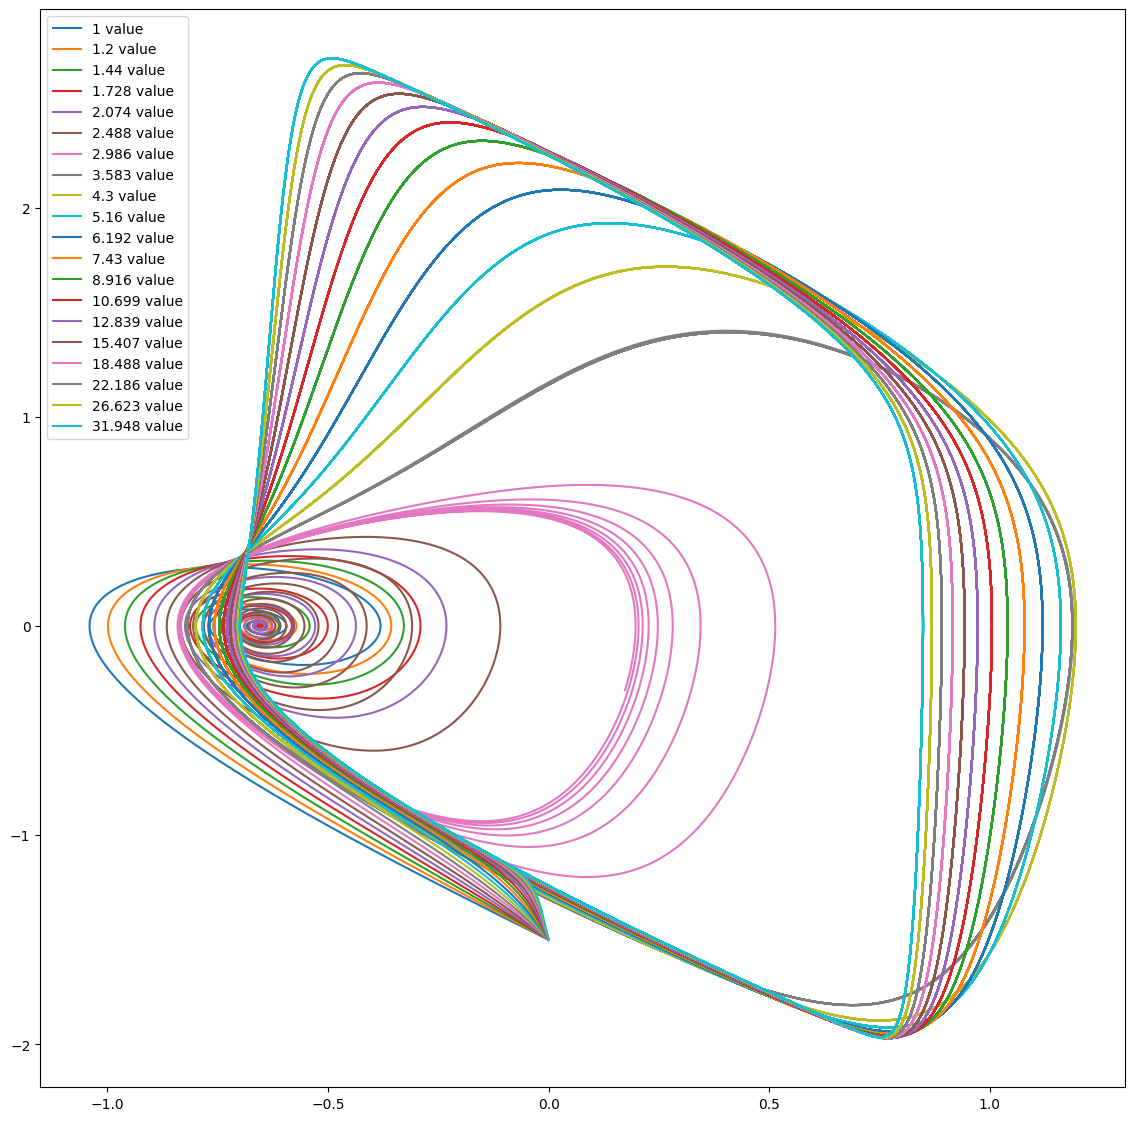

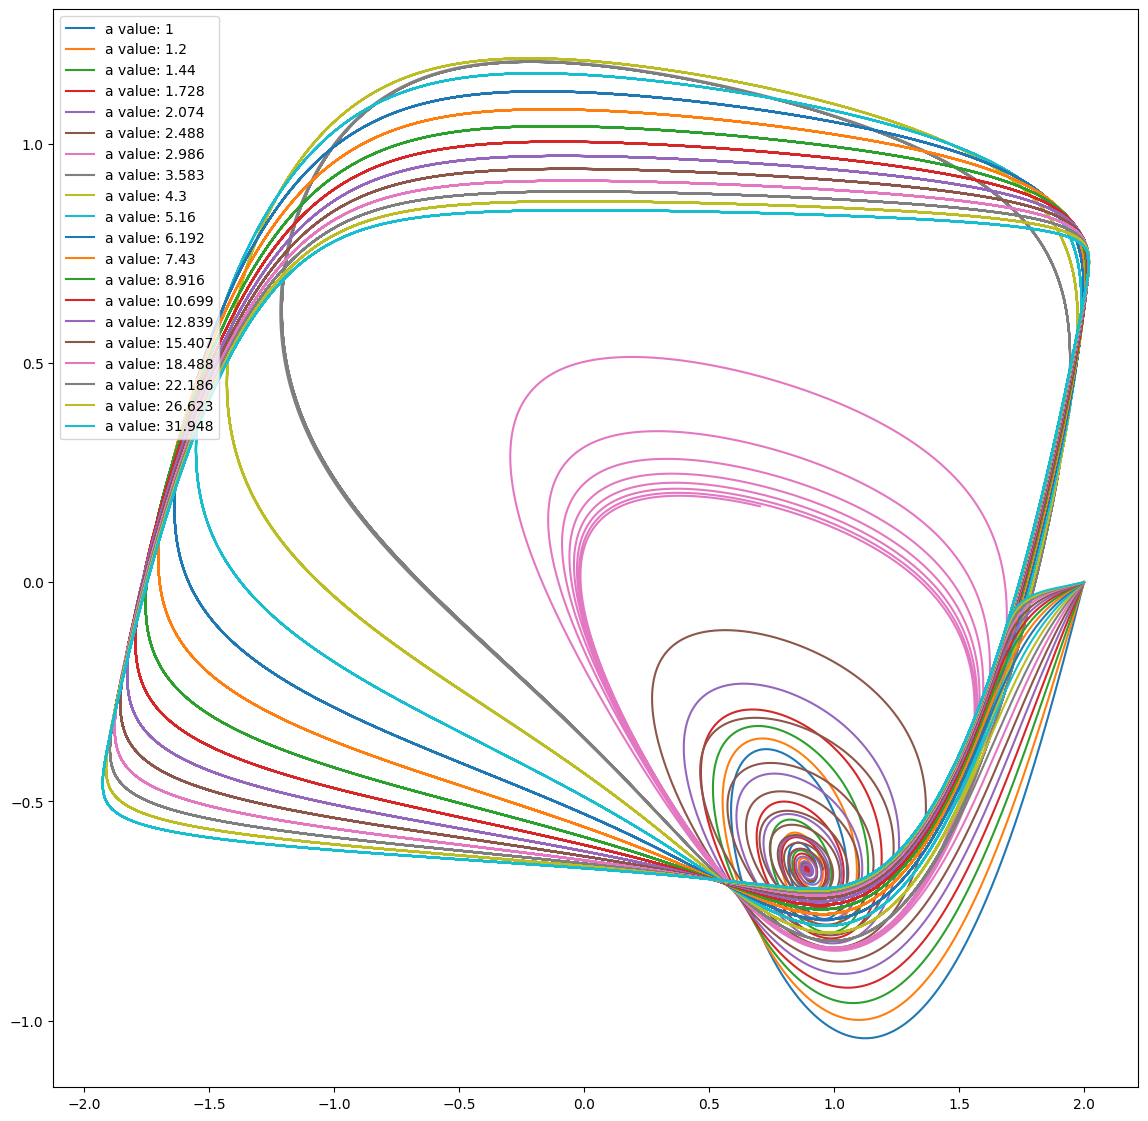

In [135]:
T = 0.01
t_start = 0
t_finish = 40
a = 1
fig1 = plt.figure(figsize=(10,18))
px1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(14, 14))
px2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(14, 14))
px3 = fig3.add_subplot(111)
while a <= 32:
    c = 0.5
    b = 0.60
    # Первый элемент это x, второй y
    variables = (T, a, b, c)
    array0 = [(2, 0)]
    array1 = sol.do_method(sol.explicit1_method, T, False)
    array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(2, 0)], variables)

    arrayx1 = [i[0] for i in array1[1]]
    arrayx2 = [i[0] for i in array2[1]]

    # main_array.append(arrayx3)
    # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
    # array_dif_x3 = [[i[0] for i in array3_dif]]
    # draw([array1[0], array2[0]],
    #     [arrayx1, arrayx2],
    #     [f"явный 1-го порядка {len(array1[0])}", f"неявный 2го"])
    draw_on_plot([arrayx2], [[i[0] for i in array2[2]]], [f"{round(a, 3)} value"], px1)
    # draw([[i[0] for i in array2[2]]], [arrayx2], [f"{a} value"])
    draw_on_plot([[i[1] for i in array2[1]]], [[i[1] for i in array2[2]]], [f"{round(a, 3)} value"], px2)
    draw_on_plot([arrayx2], [[i[1] for i in array2[1]]], [f"a value: {round(a, 3)}"], px3)
    a *= 1.2
px1.legend(loc='upper left')
px2.legend(loc='upper left')
px3.legend(loc='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


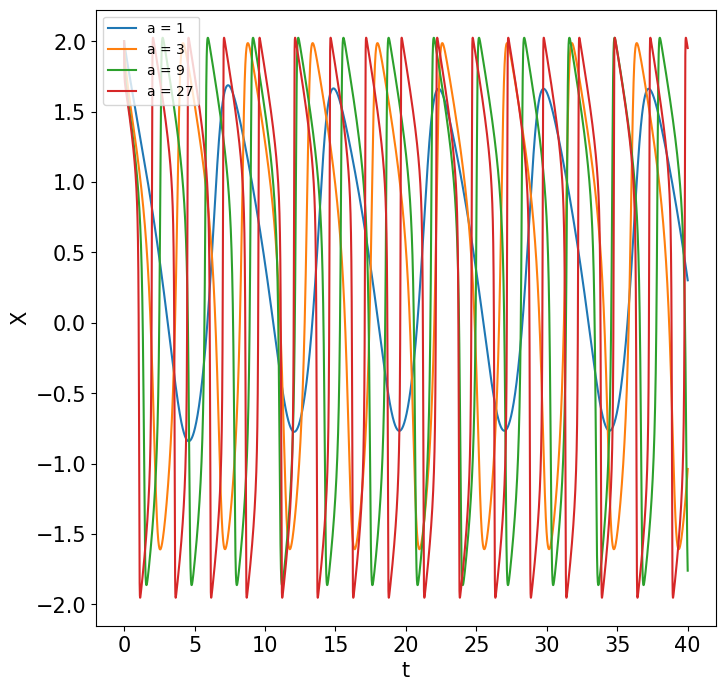

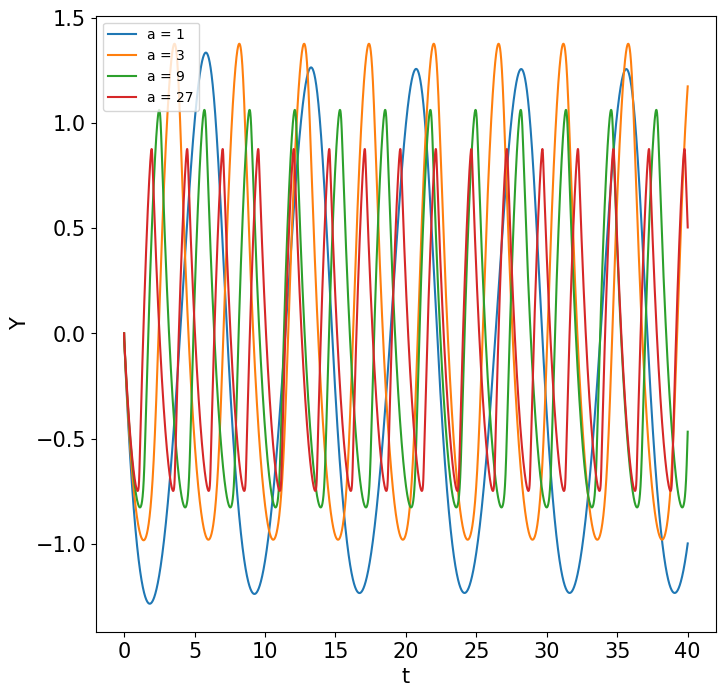

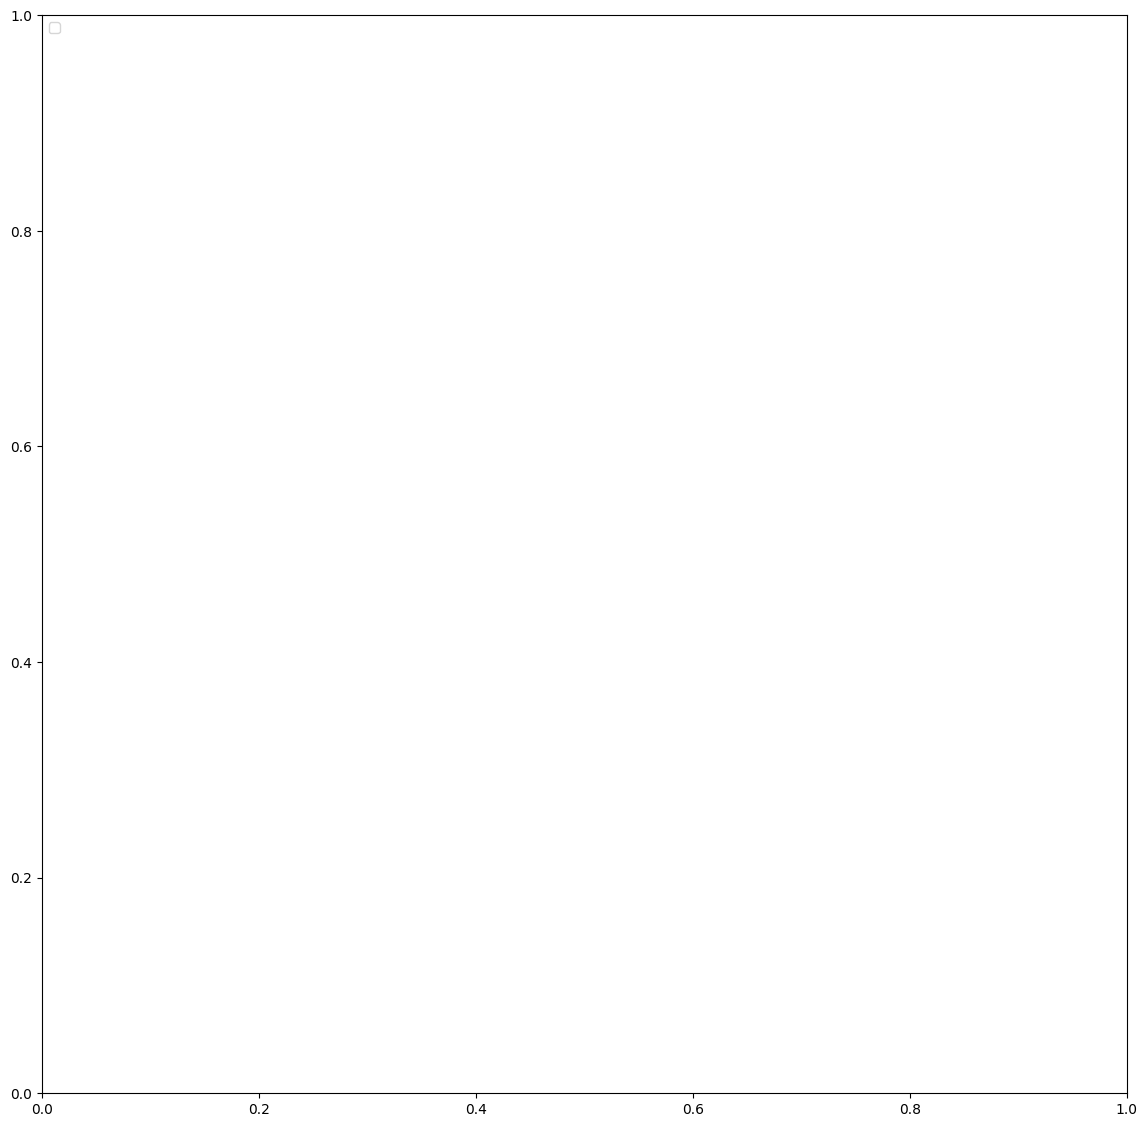

In [137]:
T = 0.01
t_start = 0
t_finish = 40
a = 1
fig1 = plt.figure(figsize=(8,8))
px1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(8, 8))
px2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(14, 14))
px3 = fig3.add_subplot(111)
while a <= 32:
    c = 0.4
    b = 0.60
    # Первый элемент это x, второй y
    variables = (T, a, b, c)
    array0 = [(2, 0)]
    array1 = sol.do_method(sol.explicit1_method, T, False)
    array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(2, 0)], variables)

    arrayx1 = [i[0] for i in array1[1]]
    arrayx2 = [i[0] for i in array2[1]]
    arrayy2 = [i[1] for i in array2[1]]
    # main_array.append(arrayx3)
    # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
    # array_dif_x3 = [[i[0] for i in array3_dif]]
    # draw([array1[0], array2[0]],
    #     [arrayx1, arrayx2],
    #     [f"явный 1-го порядка {len(array1[0])}", f"неявный 2го"])
    draw_on_plot([array2[0]], [arrayx2], [f"a = {round(a, 3)}"], px1)
    draw_on_plot([array2[0]], [arrayy2], [f"a = {round(a, 3)}"], px2)
    # draw([[i[0] for i in array2[2]]], [arrayx2], [f"{a} value"])
    # draw_on_plot([[i[1] for i in array2[1]]], [[i[1] for i in array2[2]]], [f"{round(a, 3)} value"], px2)
    # draw_on_plot([arrayx2], [[i[1] for i in array2[1]]], [f"a value: {round(a, 3)}"], px3)
    a *= 3
ls = 15
fs = 6
fonts = 15
px1.tick_params(axis="both", which="major", labelsize=ls)
px1.set_xlabel("t", fontsize = fonts)
px1.set_ylabel("X", fontsize = fonts)
px1.legend(fontsize=fonts-3)
px2.tick_params(axis="both", which="major", labelsize=ls)
px2.set_xlabel("t", fontsize = fonts)
px2.set_ylabel("Y", fontsize = fonts)
px2.legend(fontsize=fonts-3)
px1.legend(loc='upper left')
px2.legend(loc='upper left')
px3.legend(loc='upper left')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


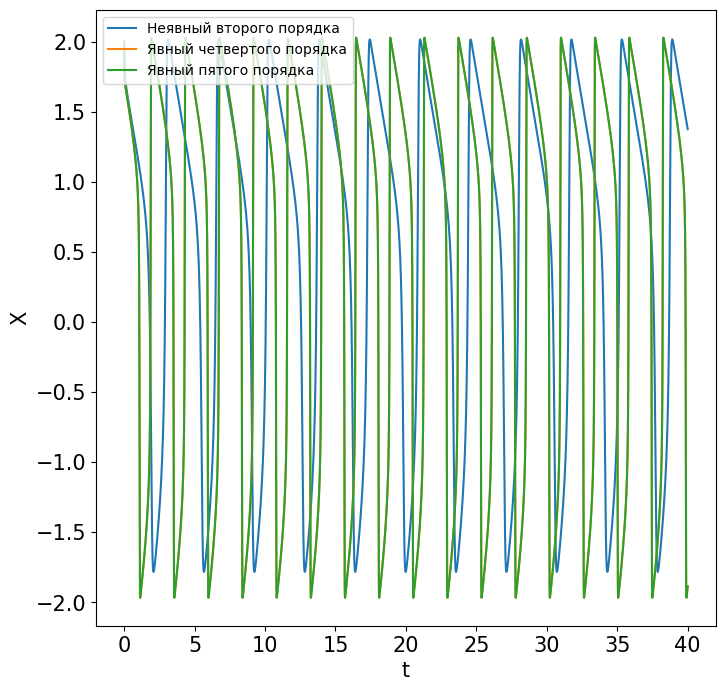

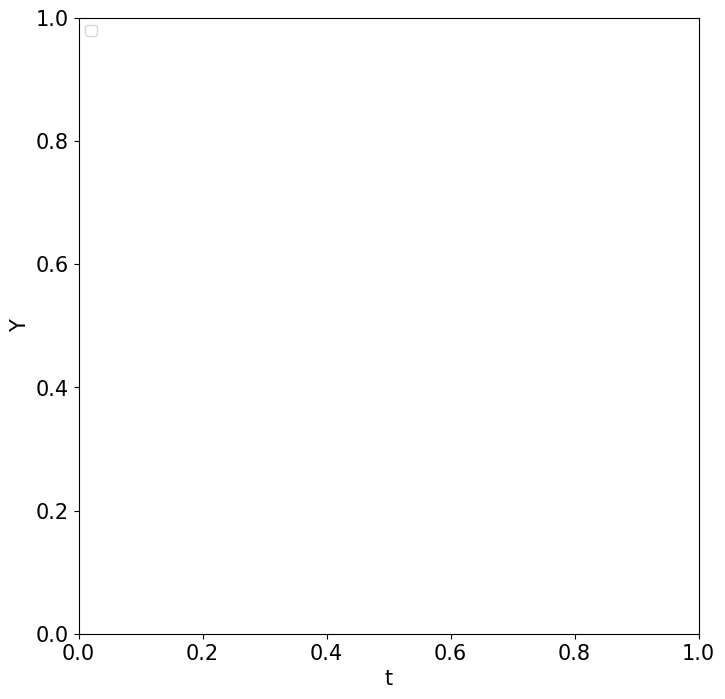

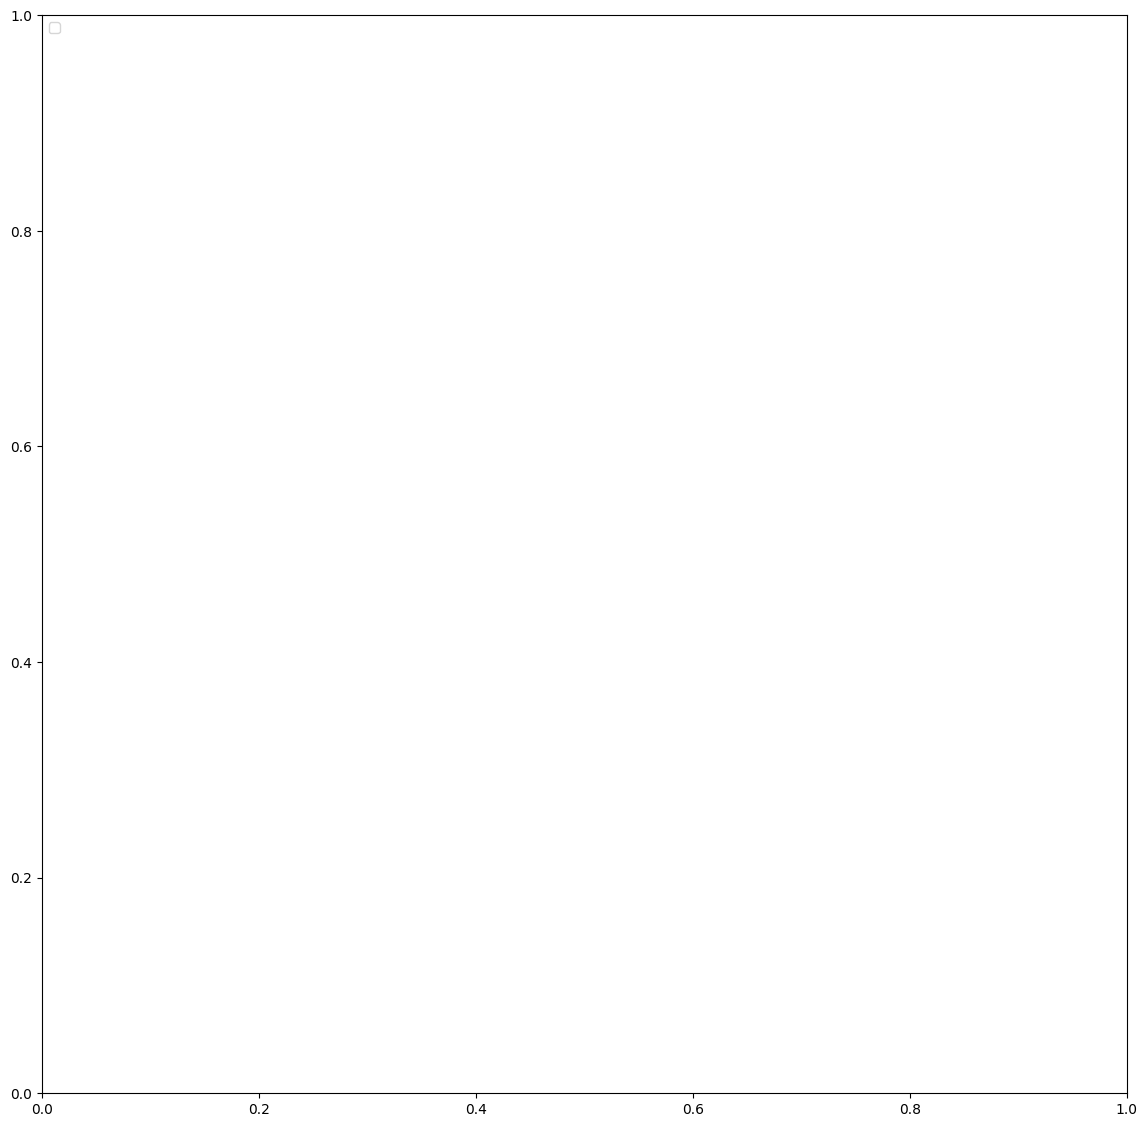

In [133]:
T = 0.001
t_start = 0
t_finish = 40
a = 1
fig1 = plt.figure(figsize=(8,8))
px1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(8, 8))
px2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(14, 14))
px3 = fig3.add_subplot(111)
a = 10
c = 0.5
b = 0.60
# Первый элемент это x, второй y
variables = (T, a, b, c)
array0 = [(2, 0)]
array1 = sol.do_method(sol.explicit1_method, T, False)
array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(2, 0)], variables)
array3 = sol.do_method(sol.explicit4_method, T, False)
array4 = sol.do_method(sol.explicit5_method, T, False)
arrayx1 = [i[0] for i in array1[1]]
arrayx2 = [i[0] for i in array2[1]]
arrayy2 = [i[1] for i in array2[1]]
# main_array.append(arrayx3)
# print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
# array_dif_x3 = [[i[0] for i in array3_dif]]
# draw([array1[0], array2[0]],
#     [arrayx1, arrayx2],
#     [f"явный 1-го порядка {len(array1[0])}", f"неявный 2го"])
draw_on_plot([array2[0]], [arrayx2], ["Неявный второго порядка"], px1)
draw_on_plot([array3[0]], [[i[0] for i in array3[1]]], [f"Явный четвертого порядка"], px1)
draw_on_plot([array4[0]], [[i[0] for i in array4[1]]], [f"Явный пятого порядка"], px1)
# draw([[i[0] for i in array2[2]]], [arrayx2], [f"{a} value"])
# draw_on_plot([[i[1] for i in array2[1]]], [[i[1] for i in array2[2]]], [f"{round(a, 3)} value"], px2)
# draw_on_plot([arrayx2], [[i[1] for i in array2[1]]], [f"a value: {round(a, 3)}"], px3)
a *= 3
ls = 15
fs = 6
fonts = 15
px1.tick_params(axis="both", which="major", labelsize=ls)
px1.set_xlabel("t", fontsize = fonts)
px1.set_ylabel("X", fontsize = fonts)
px1.legend(fontsize=fonts-3)
px2.tick_params(axis="both", which="major", labelsize=ls)
px2.set_xlabel("t", fontsize = fonts)
px2.set_ylabel("Y", fontsize = fonts)
px2.legend(fontsize=fonts-3)
px1.legend(loc='upper left')
px2.legend(loc='upper left')
px3.legend(loc='upper left')